In [1]:
#Bài tập buổi 6

In [2]:
import os
import pandas as pd

In [3]:
#1
os.chdir(r'C:\Users\MSI-admin\Desktop')
df = pd.read_csv('yob2018.txt', sep = ',', names = ['Name', 'Sex', 'Number'])
df

,Name,Sex,Number
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
...,...,...,...
32028,Zylas,M,5
32029,Zyran,M,5
32030,Zyrie,M,5
32031,Zyron,M,5


In [4]:
#2 Cách 1
total_born = sum(df['Number'])
total_born

3487353

In [18]:
# Cách 2
s = 0
for n in df['Number']:
    s = s + n
s

3487353

In [53]:
#3
l = []
for num in df['Number']:
    if num >= 1000:
        l.append('True')
    else:
        l.append('False')
df['popularna'] = l
df

,Name,Sex,Number,popularna
0,Emma,F,18688,True
1,Olivia,F,17921,True
2,Ava,F,14924,True
3,Isabella,F,14464,True
4,Sophia,F,13928,True
...,...,...,...,...
32028,Zylas,M,5,False
32029,Zyran,M,5,False
32030,Zyrie,M,5,False
32031,Zyron,M,5,False


In [50]:
#3 sửa bài
male_df = df[df['Sex']=='M']
male_df = male_df.sort_values(by='Number', ascending = False)
male_df = male_df.head(1000)

In [51]:
male_df = male_df.reset_index(drop=True)
male_df

,Name,Sex,Number,Check_Lesl
0,Liam,M,19837,Not Lesl
1,Noah,M,18267,Not Lesl
2,William,M,14516,Not Lesl
3,James,M,13525,Not Lesl
4,Oliver,M,13389,Not Lesl
...,...,...,...,...
995,Korbyn,M,207,Not Lesl
996,Randall,M,207,Not Lesl
997,Benton,M,206,Not Lesl
998,Coleman,M,206,Not Lesl


In [46]:
female_df = df[df['Sex']=='F']
female_df = female_df.sort_values(by='Number', ascending = False)
female_df = female_df.head(1000)

In [47]:
female_df = female_df.reset_index(drop=True)
female_df

,Name,Sex,Number,Check_Lesl
0,Emma,F,18688,Not Lesl
1,Olivia,F,17921,Not Lesl
2,Ava,F,14924,Not Lesl
3,Isabella,F,14464,Not Lesl
4,Sophia,F,13928,Not Lesl
...,...,...,...,...
995,Whitley,F,260,Not Lesl
996,Austyn,F,260,Not Lesl
997,Kimora,F,259,Not Lesl
998,Maliah,F,259,Not Lesl


In [60]:
#------#
df_dataframe = pd.DataFrame(data = df[df['popularna'] == 'True'])

In [61]:
df_dataframe

,Name,Sex,Number,popularna
0,Emma,F,18688,True
1,Olivia,F,17921,True
2,Ava,F,14924,True
3,Isabella,F,14464,True
4,Sophia,F,13928,True
...,...,...,...,...
18356,Garrett,M,1010,True
18357,Hector,M,1006,True
18358,Angelo,M,1004,True
18359,Jeffrey,M,1003,True


In [62]:
#4
total_born1 = sum(df_dataframe['Number'])
total_born1

2116038

In [63]:
(total_born1 / total_born)* 100

60.67748231968487

In [52]:
#4 Sửa bài
male_num = sum(male_df['Number'])
female_num = sum(female_df['Number'])
(male_num + female_num)*100/s

78.71815672230485

In [33]:
#5
#C1
df[df['Name'].str.startswith('Lesl')]

,Name,Sex,Number
519,Leslie,F,597
1222,Lesly,F,190
2780,Lesley,F,61
9460,Lesli,F,11
13158,Lesleigh,F,7
14799,Leslee,F,6
14800,Leslye,F,6
21152,Leslie,M,37


In [36]:
#C2
l =[]
for name in df['Name']:
    if name[0:4] == 'Lesl':
        l.append(name)
    else:
        l.append('Not Lesl')
df['Check_Lesl'] = l
lesl_df = df[df['Check_Lesl'] != 'Not Lesl']
lesl_df.drop('Check_Lesl', axis = 1, inplace = True)

C:\Users\MSI-admin\AppData\Local\Temp\ipykernel_18100\3508384443.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesl_df.drop('Check_Lesl', axis = 1, inplace = True)


In [37]:
lesl_df

,Name,Sex,Number
519,Leslie,F,597
1222,Lesly,F,190
2780,Lesley,F,61
9460,Lesli,F,11
13158,Lesleigh,F,7
14799,Leslee,F,6
14800,Leslye,F,6
21152,Leslie,M,37


In [53]:
#C1
pivot = pd.pivot_table(lesl_df, index = 'Sex', values = 'Number', aggfunc = sum)
pivot

,Number
Sex,
F,878
M,37


In [54]:
#C2
sum(lesl_df['Number'])

915

In [55]:
#C3
male_lesl_df = lesl_df[lesl_df['Sex']=='M']
sum(male_lesl_df['Number'])

37

In [56]:
female_lesl_df = lesl_df[lesl_df['Sex']=='F']
sum(female_lesl_df['Number'])

878

In [64]:
#6
first_letter_list = []
for name in df['Name']:
    first_letter_list.append(name[0])
df['first_letter'] = first_letter_list
df.drop('Check_Lesl', axis = 1, inplace = True)
df

,Name,Sex,Number,first_letter
0,Emma,F,18688,E
1,Olivia,F,17921,O
2,Ava,F,14924,A
3,Isabella,F,14464,I
4,Sophia,F,13928,S
...,...,...,...,...
32028,Zylas,M,5,Z
32029,Zyran,M,5,Z
32030,Zyrie,M,5,Z
32031,Zyron,M,5,Z


In [67]:
pivot_2 = pd.pivot_table(df, index = 'first_letter', values = 'Number', aggfunc = len)
pivot_2

,Number
first_letter,
A,4410
B,1306
C,1542
D,1690
E,1531
F,417
G,669
H,874
I,591


In [69]:
pivot_2.sort_values(by='Number', ascending = False).head(10)

,Number
first_letter,
A,4410
K,2963
M,2538
J,2422
S,2055
D,1690
R,1639
L,1572
C,1542


In [74]:
df['first_letter'].value_counts()

A    4410
K    2963
M    2538
J    2422
S    2055
D    1690
R    1639
L    1572
C    1542
E    1531
T    1308
B    1306
N    1146
Z     929
H     874
G     669
I     591
Y     535
P     515
F     417
O     394
V     376
W     307
X     134
Q      92
U      78
Name: first_letter, dtype: int64

In [75]:
# Buổi 8
pivot_2 = pivot_2.reset_index()
pivot_2

,first_letter,Number
0,A,4410
1,B,1306
2,C,1542
3,D,1690
4,E,1531
5,F,417
6,G,669
7,H,874
8,I,591
9,J,2422


<AxesSubplot:xlabel='first_letter', ylabel='Number'>

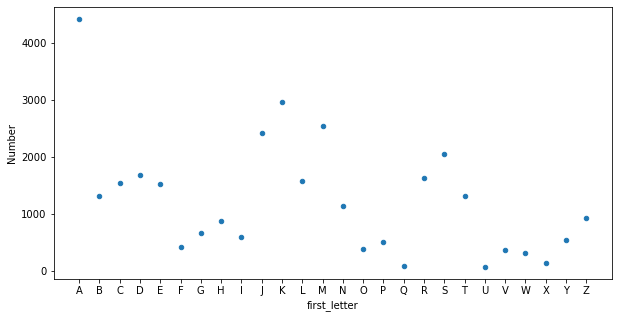

In [92]:
ax = pivot_2.plot.scatter(x = 'first_letter', y = 'Number', figsize = (10,5))
ax